# Model - B Feed Forward Network with ReLU activation function with Adam Optimizer with 1 hidden layer

Name: Hrishikesh P

Roll No: AM.EN.U4CSE19024

Class: S5 CSE-A

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install jovian opendatasets --upgrade --quiet
import opendatasets as od

     |████████████████████████████████| 68 kB 5.0 MB/s 


In [2]:
dataset_url = 'https://www.kaggle.com/omeret/not-safe-for-work'

In [4]:
!pip install jovian opendatasets --upgrade --quiet
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: bingazuran
Your Kaggle Key: ··········


100%|██████████| 19.4G/19.4G [06:26<00:00, 53.9MB/s]


In [5]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
import torchvision.transforms as transforms

In [6]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [8]:
data_dir = './not-safe-for-work'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['test', 'train']
['nsfw', 'sfw']


In [9]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [10]:
transform = transforms.Compose([

    transforms.Resize(256),
    transforms.CenterCrop(256),

    transforms.ToTensor(),
])

In [11]:
trainset = ImageFolder(data_dir+'/train', transform=transform)
testset = ImageFolder(data_dir+'/test', transform=transform)

In [12]:
trainset_subset1 = torch.utils.data.Subset(trainset, np.random.choice(len(trainset), 5000, replace=False))
testset_subset1 = torch.utils.data.Subset(testset, np.random.choice(len(testset), 1000, replace=False))

In [13]:
img, label = trainset_subset1[0]
print(img.shape, label)
img

torch.Size([3, 256, 256]) 0


tensor([[[0.5333, 0.5686, 0.5882,  ..., 0.2627, 0.2627, 0.2588],
         [0.5294, 0.5647, 0.5882,  ..., 0.2667, 0.2667, 0.2627],
         [0.5333, 0.5725, 0.5961,  ..., 0.2667, 0.2667, 0.2627],
         ...,
         [0.9333, 0.9373, 0.9373,  ..., 0.9451, 0.9451, 0.9490],
         [0.9333, 0.9333, 0.9373,  ..., 0.9451, 0.9451, 0.9451],
         [0.9333, 0.9333, 0.9373,  ..., 0.9451, 0.9451, 0.9451]],

        [[0.4863, 0.5216, 0.5373,  ..., 0.2078, 0.2078, 0.2157],
         [0.4824, 0.5176, 0.5373,  ..., 0.2118, 0.2118, 0.2196],
         [0.4863, 0.5255, 0.5412,  ..., 0.2118, 0.2157, 0.2196],
         ...,
         [0.9333, 0.9373, 0.9373,  ..., 0.8235, 0.8235, 0.8275],
         [0.9333, 0.9333, 0.9373,  ..., 0.8275, 0.8314, 0.8314],
         [0.9333, 0.9333, 0.9373,  ..., 0.8275, 0.8314, 0.8314]],

        [[0.4039, 0.4353, 0.4510,  ..., 0.2039, 0.2039, 0.2078],
         [0.4000, 0.4314, 0.4510,  ..., 0.2078, 0.2078, 0.2118],
         [0.4039, 0.4392, 0.4588,  ..., 0.2078, 0.2118, 0.

In [14]:
input_size = 65536*3
hidden_size = 500 
num_classes = 2
num_epochs = 5
batch_size = 100
learning_rate = 0.001 

In [15]:
train_loader1 = torch.utils.data.DataLoader(
    dataset=trainset_subset1,
    batch_size=batch_size,
    shuffle=False  
)

In [16]:
test_loader1 = torch.utils.data.DataLoader(
    dataset=testset_subset1,
    batch_size=batch_size,
    shuffle=False
)

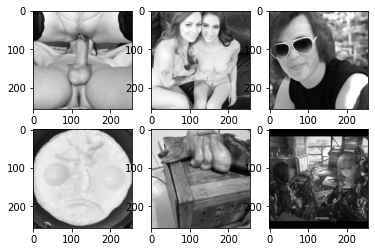

In [17]:
 examples = iter(test_loader1)
 example_data, example_targets = examples.next()
 for i in range(6):
     plt.subplot(2,3,i+1)
     plt.imshow(example_data[i][0], cmap='gray')
 plt.show() 

In [18]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

In [19]:
model1 = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [ ]:
model2 = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [ ]:
model3 = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [20]:
# Loss and optimizer
criterion1 = nn.CrossEntropyLoss()
optimizer1 = torch.optim.Adam(model1.parameters(), lr=learning_rate)

In [22]:
criterion2 = nn.CrossEntropyLoss()
optimizer2 = torch.optim.Adam(model2.parameters(), lr=learning_rate)

In [23]:
criterion3 = nn.CrossEntropyLoss()
optimizer3 = torch.optim.Adam(model3.parameters(), lr=learning_rate)

In [29]:
# Train the model
iteration = []
iter = 0
accuracy_train = []
accuracy_test = []
loss_values = []

    
n_total_steps = len(train_loader1)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader1):  
        images = images.reshape(-1, 256*256*3).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model1(images)
        loss = criterion1(outputs, labels)
        loss_values.append(loss)

        # Backward and optimize
        optimizer1.zero_grad()
        loss.backward()
        optimizer1.step()
        iter+=1

        if (i+1) % 50 == 0:
            correct = 0
            total = 0
            iteration.append(iter)
            #training accuracy
            for images, labels in train_loader1:
                images = images.view(-1, 256*256*3).requires_grad_()
                outputs = model1(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum()
            accuracy1 = 100 * correct / total
            accuracy_train.append(accuracy1)

            
            with torch.no_grad():
                n_correct = 0
                n_samples = 0
                for images, labels in test_loader1:
                    images = images.reshape(-1, 256*256*3).to(device)
                    labels = labels.to(device)
                    outputs = model1(images)
                    # max returns (value ,index)
                    _, predicted = torch.max(outputs.data, 1)
                    n_samples += labels.size(0)
                    n_correct += (predicted == labels).sum().item()
                

                acc = 100.0 * n_correct / n_samples
                accuracy_test.append(acc)
                print('Iteration: {}. Loss: {}. Train Accuracy: {}. Test Accuracy: {}'.format(iter, loss.item(), accuracy1,acc))

Iteration: 50. Loss: 0.644764244556427. Train Accuracy: 65.19999694824219. Test Accuracy: 52.0
Iteration: 100. Loss: 0.6993157863616943. Train Accuracy: 70.69999694824219. Test Accuracy: 57.2
Iteration: 150. Loss: 0.8289263844490051. Train Accuracy: 65.0999984741211. Test Accuracy: 51.9
Iteration: 200. Loss: 0.5258209109306335. Train Accuracy: 76.9000015258789. Test Accuracy: 62.0
Iteration: 250. Loss: 0.5510166883468628. Train Accuracy: 71.80000305175781. Test Accuracy: 56.9


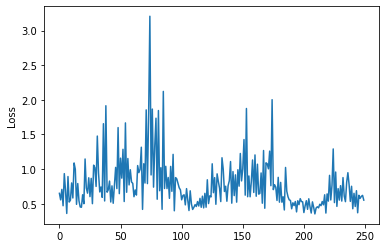

In [32]:
with torch.no_grad():
    plt.plot(loss_values)
    plt.ylabel("Loss")
    plt.plot()

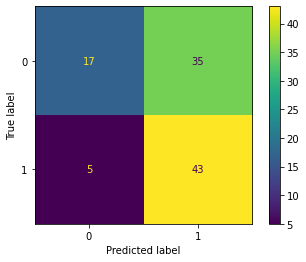

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(labels, predicted, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp.plot()
plt.show()

In [26]:
num_epochs = 10

In [27]:
# Train the model
n_total_steps = len(train_loader1)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader1):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 256*256*3).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model2(images)
        loss = criterion2(outputs, labels)

        # Backward and optimize
        optimizer2.zero_grad()
        loss.backward()
        optimizer2.step()

        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/10], Step [10/50], Loss: 7.9580
Epoch [1/10], Step [20/50], Loss: 5.2669
Epoch [1/10], Step [30/50], Loss: 3.9681
Epoch [1/10], Step [40/50], Loss: 1.3170
Epoch [1/10], Step [50/50], Loss: 1.3284
Epoch [2/10], Step [10/50], Loss: 0.4822
Epoch [2/10], Step [20/50], Loss: 0.5416
Epoch [2/10], Step [30/50], Loss: 0.5299
Epoch [2/10], Step [40/50], Loss: 0.5892
Epoch [2/10], Step [50/50], Loss: 0.7701
Epoch [3/10], Step [10/50], Loss: 0.4778
Epoch [3/10], Step [20/50], Loss: 0.6039
Epoch [3/10], Step [30/50], Loss: 0.4940
Epoch [3/10], Step [40/50], Loss: 0.5863
Epoch [3/10], Step [50/50], Loss: 0.7610
Epoch [4/10], Step [10/50], Loss: 0.4433
Epoch [4/10], Step [20/50], Loss: 0.6214
Epoch [4/10], Step [30/50], Loss: 0.5075
Epoch [4/10], Step [40/50], Loss: 0.5797
Epoch [4/10], Step [50/50], Loss: 0.8308
Epoch [5/10], Step [10/50], Loss: 0.4483
Epoch [5/10], Step [20/50], Loss: 0.6199
Epoch [5/10], Step [30/50], Loss: 0.5199
Epoch [5/10], Step [40/50], Loss: 0.5437
Epoch [5/10], St

In [42]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader1:
        images = images.reshape(-1, 256*256*3).to(device)
        labels = labels.to(device)
        outputs = model2(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on test images: {acc} %')

Accuracy of the network on test images: 72.4 %


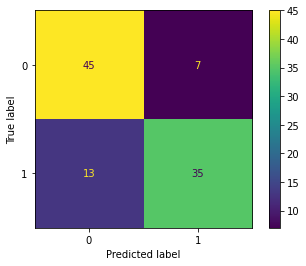

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(labels, predicted, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp.plot()
plt.show()

In [29]:
num_epochs = 15

In [31]:
n_total_steps = len(train_loader1)
print(n_total_steps)

50


In [32]:
# Train the model
n_total_steps = len(train_loader1)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader1):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 256*256*3).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model3(images)
        loss = criterion3(outputs, labels)

        # Backward and optimize
        optimizer3.zero_grad()
        loss.backward()
        optimizer3.step()

        if (i+1) % 25 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/15], Step [25/50], Loss: 2.7575
Epoch [1/15], Step [50/50], Loss: 7.5702
Epoch [2/15], Step [25/50], Loss: 2.2842
Epoch [2/15], Step [50/50], Loss: 7.7438
Epoch [3/15], Step [25/50], Loss: 3.3616
Epoch [3/15], Step [50/50], Loss: 1.9135
Epoch [4/15], Step [25/50], Loss: 5.7969
Epoch [4/15], Step [50/50], Loss: 13.0614
Epoch [5/15], Step [25/50], Loss: 7.2524
Epoch [5/15], Step [50/50], Loss: 1.4409
Epoch [6/15], Step [25/50], Loss: 0.6605
Epoch [6/15], Step [50/50], Loss: 3.8363
Epoch [7/15], Step [25/50], Loss: 0.5989
Epoch [7/15], Step [50/50], Loss: 0.7322
Epoch [8/15], Step [25/50], Loss: 0.5453
Epoch [8/15], Step [50/50], Loss: 0.8922
Epoch [9/15], Step [25/50], Loss: 1.6114
Epoch [9/15], Step [50/50], Loss: 0.6611
Epoch [10/15], Step [25/50], Loss: 0.5233
Epoch [10/15], Step [50/50], Loss: 0.5597
Epoch [11/15], Step [25/50], Loss: 0.5753
Epoch [11/15], Step [50/50], Loss: 0.4786
Epoch [12/15], Step [25/50], Loss: 0.6551
Epoch [12/15], Step [50/50], Loss: 0.4686
Epoch [13

In [33]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader1:
        images = images.reshape(-1, 256*256*3).to(device)
        labels = labels.to(device)
        outputs = model3(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on test images: {acc} %')

Accuracy of the network on test images: 66.4 %


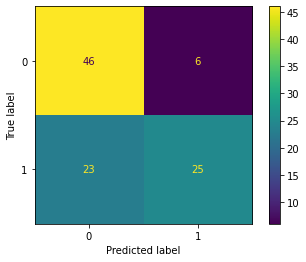

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(labels, predicted, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp.plot()
plt.show()